In [108]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import zscore

In [121]:
# Load the dataset from CSV file
file_path = r"C:\Users\Nagendra Hegde\Downloads\Assignment1Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Employee ID   Age  Gender Education Level Department              Job Role  \
0       200001  25.0    Male      Bachelor's         IT     Software Engineer   
1       200002  34.0  Female        Master's  Marketing     Marketing Manager   
2       200003  42.0    Male             PhD   Research    Research Scientist   
3       200004  29.0  Female         Diploma      Sales  Sales Representative   
4       200005  36.0    Male      Bachelor's         IT     Software Engineer   

   Salary (USD)  Income (Euro)  Years of Experience  Performance Rating  \
0       50000.0       350000.0                  3.0                 3.0   
1       75000.0       525000.0                 10.0                 4.0   
2      100000.0       700000.0                 20.0                 5.0   
3       45000.0       315000.0                  2.0                 2.0   
4       80000.0       560000.0                 12.0                 4.0   

   Working Hours  Distance from

In [110]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
         Employee ID        Age   Salary (USD)  Income (Euro)  \
count     100.000000  98.000000      92.000000      98.000000   
mean   200050.500000  32.561224   69619.565217  490459.183673   
std        29.011492   6.935738   22620.054504  153918.050787   
min    200001.000000  17.000000   45000.000000  315000.000000   
25%    200025.750000  29.000000   50000.000000  385000.000000   
50%    200050.500000  31.500000   60000.000000  442500.000000   
75%    200075.250000  35.750000   82500.000000  612500.000000   
max    200100.000000  79.000000  120000.000000  840000.000000   

       Years of Experience  Performance Rating  Working Hours  \
count            94.000000           98.000000      98.000000   
mean              8.468085            3.479592     104.744898   
std               5.835933            0.986816    1011.423100   
min               2.000000            2.000000    -545.000000   
25%               3.000000            3.000000 

In [111]:
# Data types of columns
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Employee ID              int64
Age                    float64
Gender                  object
Education Level         object
Department              object
Job Role                object
Salary (USD)           float64
Income (Euro)          float64
Years of Experience    float64
Performance Rating     float64
Working Hours          float64
Distance from Home     float64
Commute Method          object
Marital Status          object
Attrition (Target)      object
dtype: object


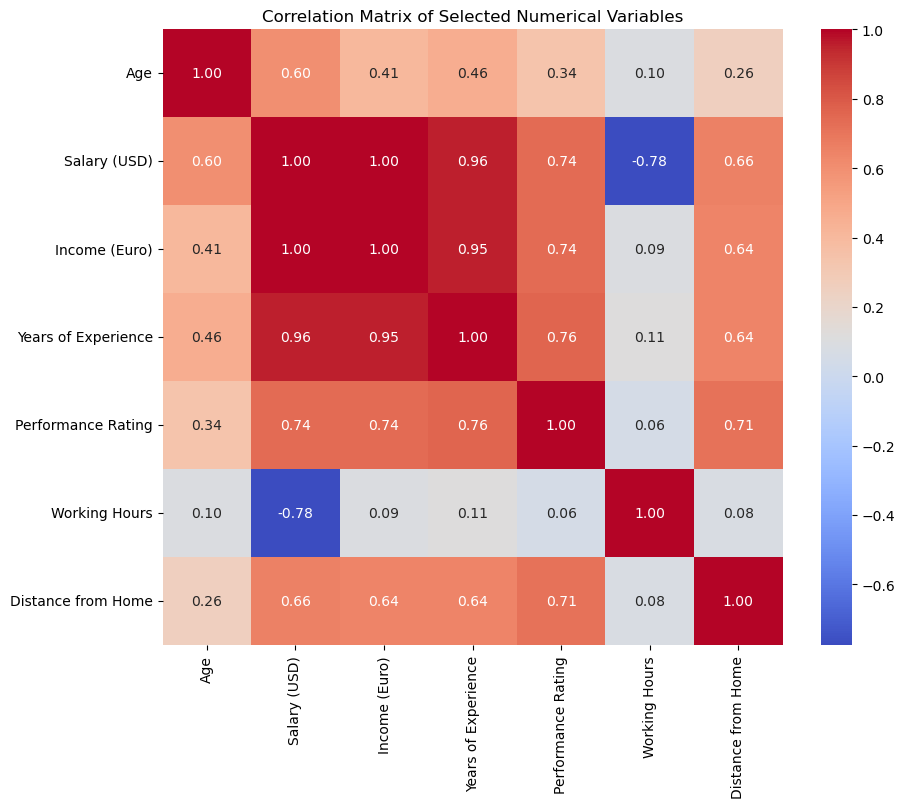

In [122]:
# Select a subset of numerical variables for visualization
numerical_subset = df[['Age', 'Salary (USD)', 'Income (Euro)', 'Years of Experience', 'Performance Rating', 'Working Hours', 'Distance from Home']]

# Plot correlation matrix
correlation_matrix = numerical_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Variables')
plt.show()

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


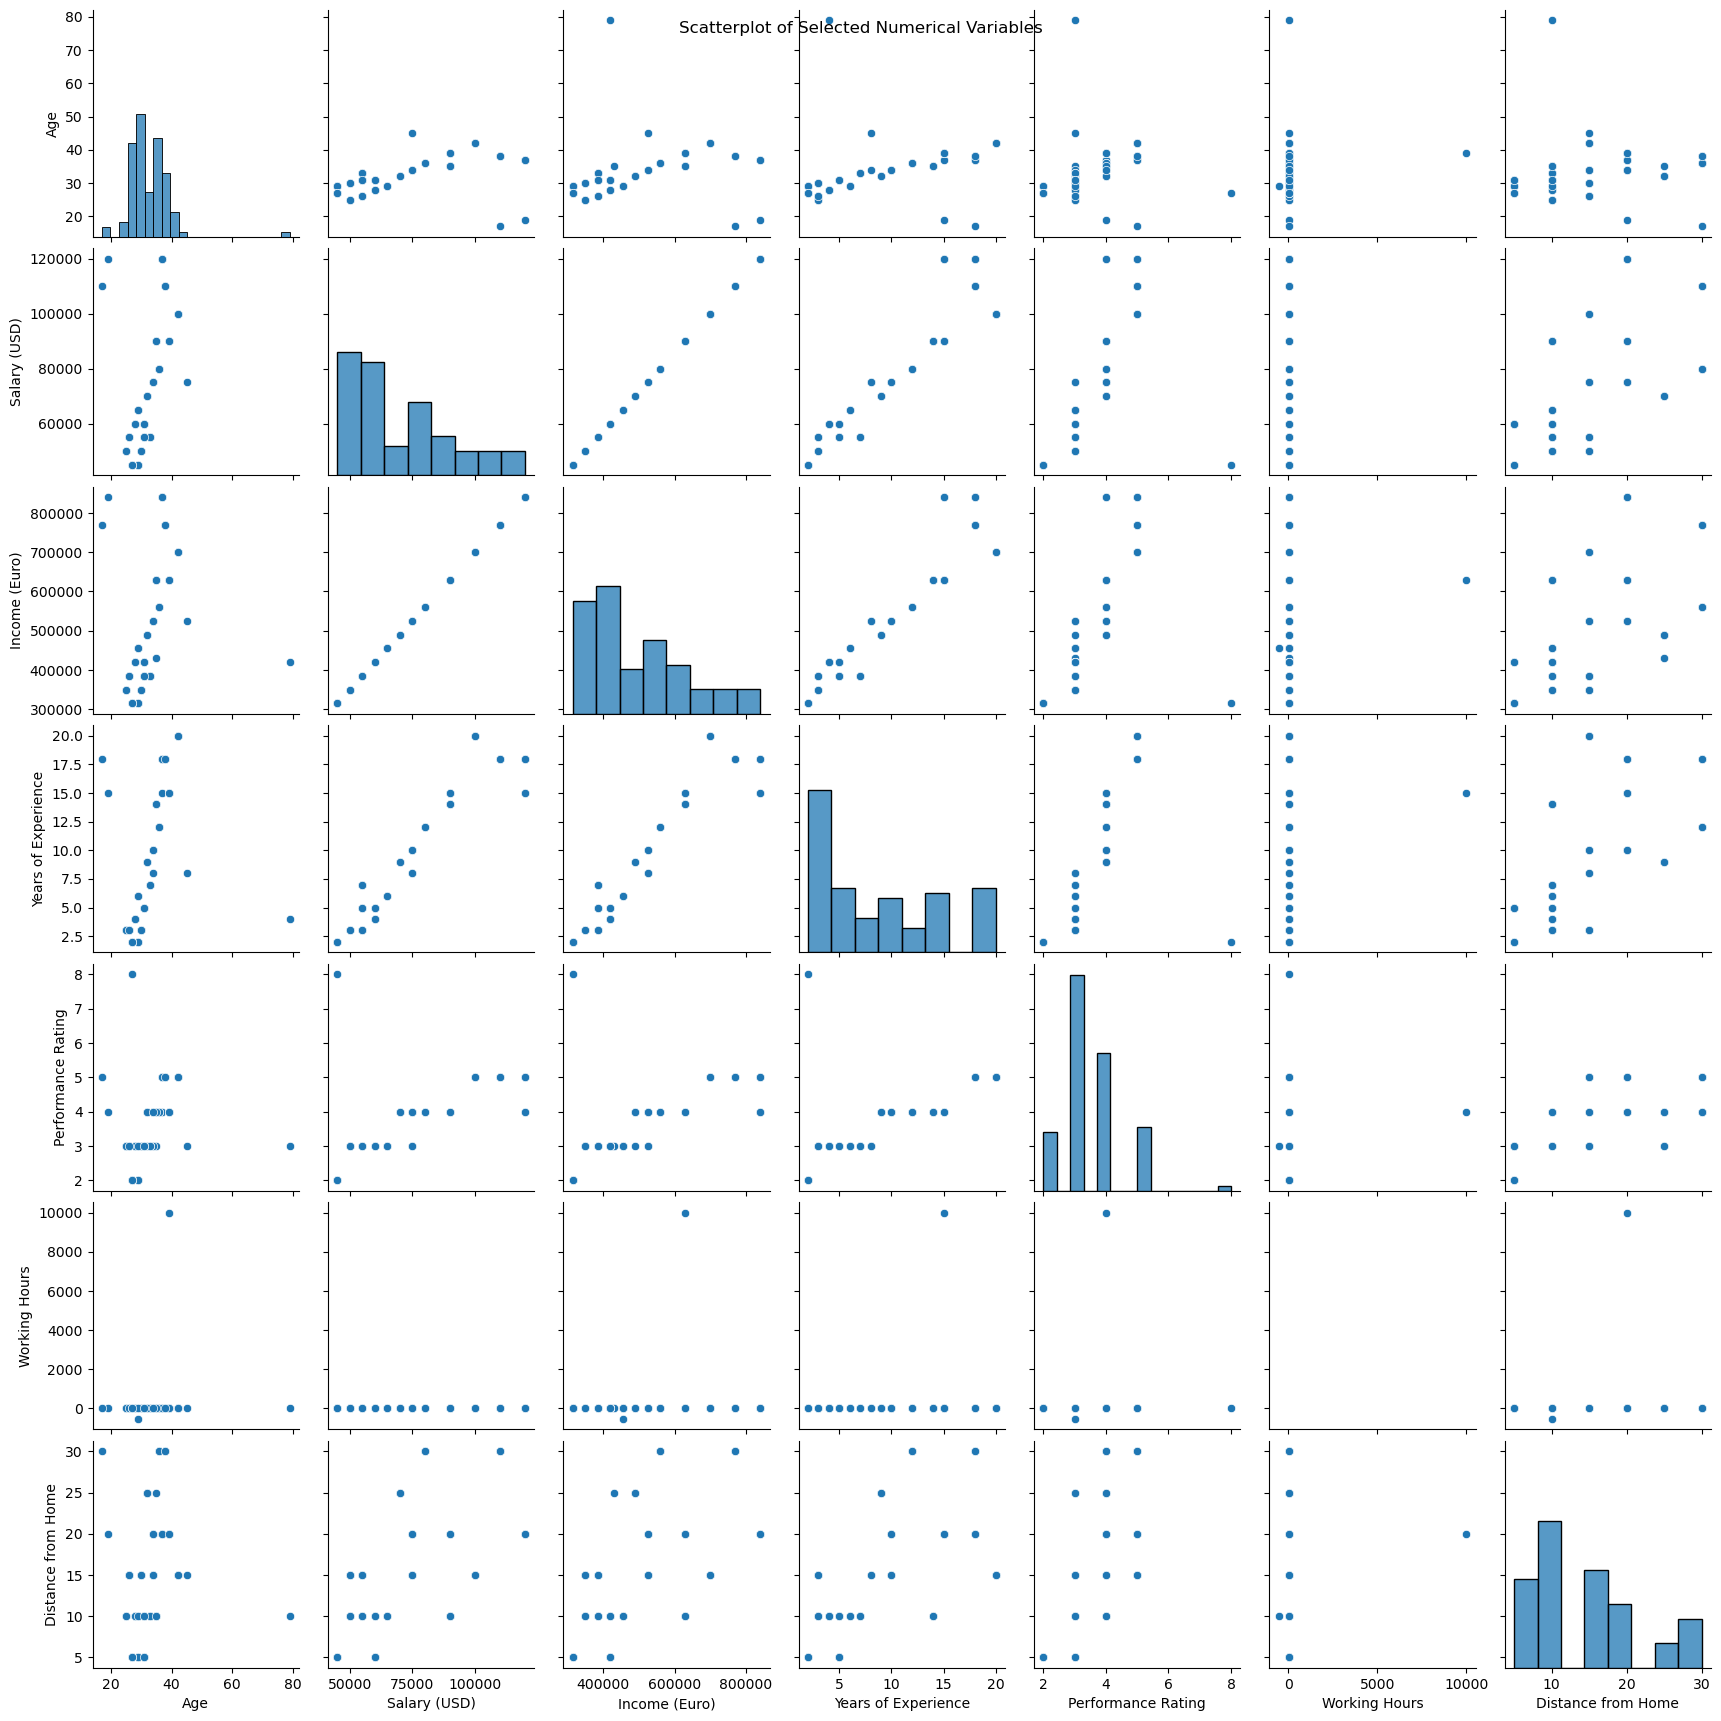

In [126]:
# Individual scatterplots for selected variable pairs
sns.pairplot(numerical_subset)
plt.suptitle('Scatterplot of Selected Numerical Variables')
plt.show()

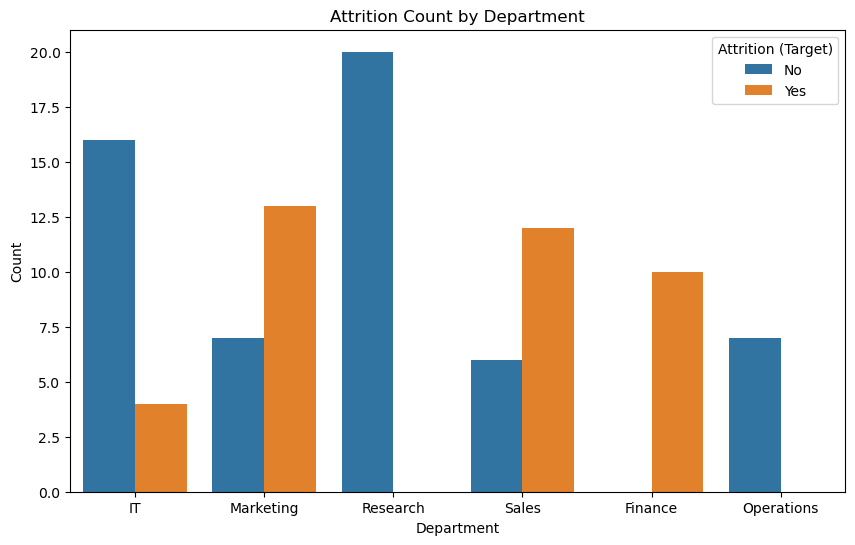

In [114]:
# Countplot to visualize the distribution of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition (Target)', data=df)
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [127]:
# Load the dataset from CSV file
file_path = r"C:\Users\Nagendra Hegde\Downloads\Assignment1Dataset.csv"
df = pd.read_csv(file_path)

# Data preprocessing
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute missing values in categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Remove outliers in numerical columns using Z-Score method
columns_to_check = ['Age', 'Salary (USD)', 'Income (Euro)', 'Years of Experience']
z_scores = df[columns_to_check].apply(zscore)
threshold = 3
outlier_mask = (z_scores.abs() > threshold).any(axis=1)
df_filtered = df[~outlier_mask]

# Split the dataset into features (X) and target variable (y)
X = df_filtered.drop('Attrition (Target)_Yes', axis=1)  # Features
y = df_filtered['Attrition (Target)_Yes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 9  1]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.90      0.95        10
        True       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



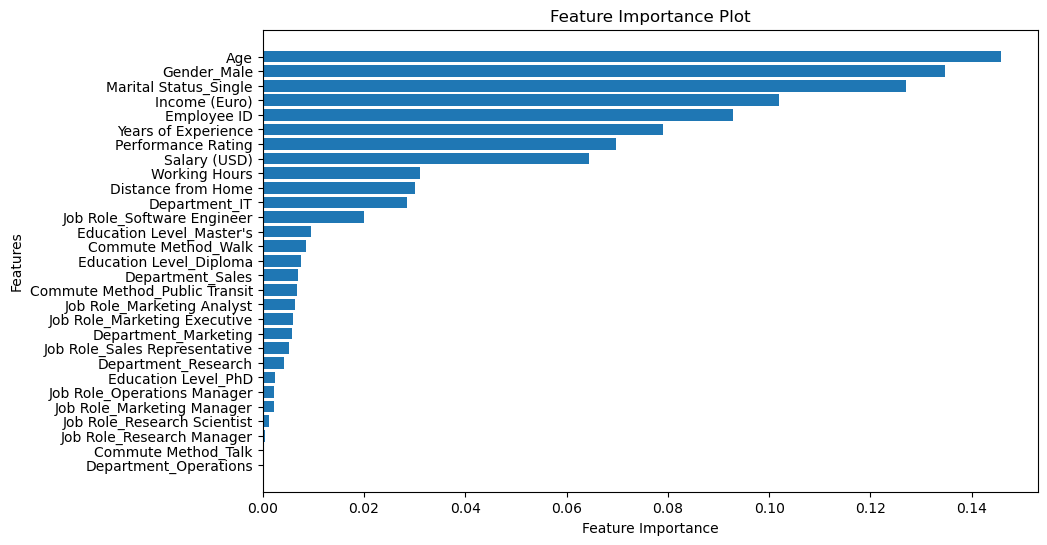

In [128]:
# Visualize feature importance
feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [129]:
# Load the dataset from CSV file
file_path = r"C:\Users\Nagendra Hegde\Downloads\Assignment1Dataset.csv"
df = pd.read_csv(file_path)

# Data preprocessing
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute missing values in categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Remove outliers in numerical columns using Z-Score method
columns_to_check = ['Age', 'Salary (USD)', 'Income (Euro)', 'Years of Experience']
z_scores = df[columns_to_check].apply(zscore)
threshold = 3
outlier_mask = (z_scores.abs() > threshold).any(axis=1)
df_filtered = df[~outlier_mask]

# Split the dataset into features (X) and target variable (y)
X = df_filtered.drop('Attrition (Target)_Yes', axis=1)  # Features
y = df_filtered['Attrition (Target)_Yes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols)
    ]
)

# Initialize and train the Logistic Regression model
logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 8  2]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.80      0.89        10
        True       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



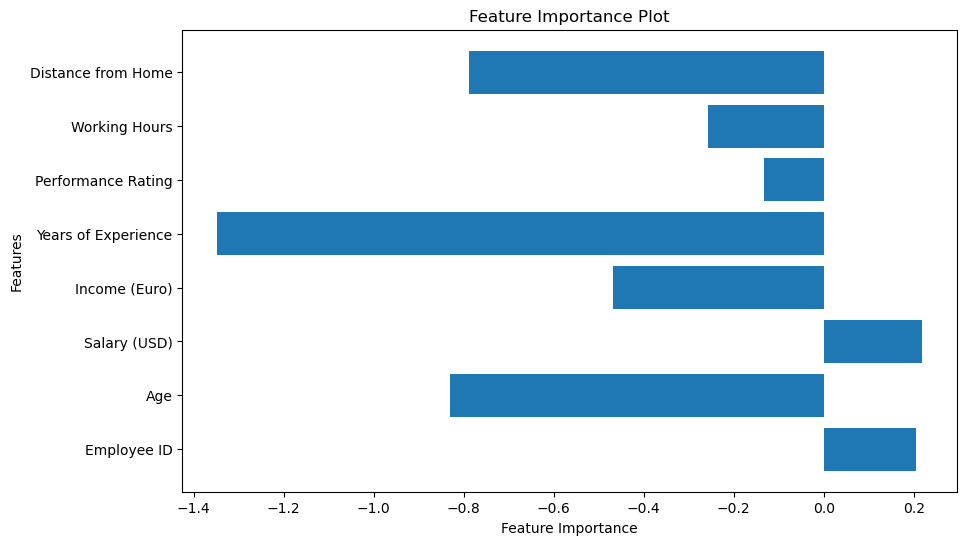

In [131]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.select_dtypes(include=['int64', 'float64']).columns, logreg_model.named_steps['classifier'].coef_[0])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()